# White Box - Supervised ML Project
__Name:__ Yaqeen Alsari

__Topic Name:__ Classification

## Introduction
Brief overview of the business challenge and dataset

### Problem Statement
Define the real-world problem the model aims to solve


### Objectives
List the key questions guiding your analysis and modeling:
- What features influence the target variable?
- Can feature engineering improve model performance?
- How do different model versions compare?


## Data Overview
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…


In [983]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Import DummyClassifier to calculate the baseline (null) model
from sklearn.dummy import DummyClassifier

# Import logistic regression
from sklearn.linear_model import LogisticRegression

In [984]:
# we have 2 files, we will load bot. and any edits on one will be done to the second aswell.
data=pd.read_csv('D:/GA-25/project3- machine learning/classificaton/train.csv')

#test_data=pd.read_csv('D:/GA-25/project3- machine learning/classificaton/test.csv')



C:\Users\yaqee\AppData\Local\Temp\ipykernel_23540\920738525.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('D:/GA-25/project3- machine learning/classificaton/train.csv')


In [985]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [986]:
data.shape

(100000, 28)

In [987]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [988]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [989]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

## Data Cleaning
__Handle missing values, outliers, and inconsistencies__
- Rename columns
- Fix data types
- Document assumptions


In [990]:
data_new=data


In [991]:
data_new.shape

(100000, 28)

In [992]:
data_new.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [993]:
data_new.replace(["_", "?", "Unknown", "NM", "None", "nan", "","NaN","NaT"], np.nan, inplace=True)

In [994]:
data_new.isnull().sum()


ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [995]:

data_new.isnull().sum()

#data = data.fillna(data.mean(numeric_only=True))


data_new = data_new.drop(columns=['Name'])
data_new = data_new.drop(columns=['Credit_Mix'])

#doing it for the raw data too. im doing only this part for both data
data = data.drop(columns=['Name'])
data = data.drop(columns=['Credit_Mix'])


cols_with_nulls_to_drop = [
    'Monthly_Inhand_Salary',
    'Type_of_Loan',
    'Num_of_Delayed_Payment',
    'Num_Credit_Inquiries',
    'Credit_History_Age',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Changed_Credit_Limit',
    'Payment_of_Min_Amount'
]

data_new = data_new.dropna(subset=cols_with_nulls_to_drop)
data_new = data_new.reset_index(drop=True)

data = data.dropna(subset=cols_with_nulls_to_drop)
data = data.reset_index(drop=True)

data_new.isnull().sum()

data_new.shape

(50804, 26)

In [996]:
data_new.isnull().sum()


ID                          0
Customer_ID                 0
Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [997]:
data_new.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1608,CUS_0xd40,July,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
2,0x160e,CUS_0x21b1,January,28_,004-07-5839,_______,34847.84,3037.986667,2,4,...,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
3,0x160f,CUS_0x21b1,February,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,...,2.0,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
4,0x1610,CUS_0x21b1,March,28,004-07-5839,Teacher,34847.84_,3037.986667,2,1385,...,2.0,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard


In [998]:
#month to date time
#age to number
#annual_income to numeric
#num of loans to numeric
#Delay_from_due_date to numeric
#Num_of_Delayed_Payment to numeric
#changed_credit_limits to numeric
#outstanding debt
#Amount_invested_monthly to numeric
#Monthly_Balance  to numeric

import datetime as datetime


data_new['Month'] = pd.to_datetime(data_new['Month'], format='%B', errors='coerce').dt.month

data_new['Age'] = data_new['Age'].astype(str).str.replace('_',"")
data_new['Age'] = data_new['Age'].astype('float64')

data_new['Annual_Income'] = pd.to_numeric(data_new['Annual_Income'], errors='coerce')

data_new['Num_of_Loan'] = pd.to_numeric(data_new['Num_of_Loan'], errors='coerce')

data_new['Delay_from_due_date'] = pd.to_numeric(data_new['Delay_from_due_date'], errors='coerce')

data_new['Num_of_Delayed_Payment'] = pd.to_numeric(data_new['Num_of_Delayed_Payment'], errors='coerce')

data_new['Changed_Credit_Limit'] = pd.to_numeric(data_new['Changed_Credit_Limit'], errors='coerce')

data_new['Outstanding_Debt'] = pd.to_numeric(data_new['Outstanding_Debt'], errors='coerce')

data_new['Amount_invested_monthly'] = pd.to_numeric(data_new['Amount_invested_monthly'], errors='coerce')

data_new['Monthly_Balance'] = pd.to_numeric(data_new['Monthly_Balance'], errors='coerce')


In [999]:
data_new.dtypes

ID                           object
Customer_ID                  object
Month                         int32
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [1000]:
data.duplicated().sum()

0

In [1001]:
data_new.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1608,CUS_0xd40,7,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
2,0x160e,CUS_0x21b1,1,28.0,004-07-5839,_______,34847.84,3037.986667,2,4,...,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
3,0x160f,CUS_0x21b1,2,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,4,...,2.0,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
4,0x1610,CUS_0x21b1,3,28.0,004-07-5839,Teacher,NaN,3037.986667,2,1385,...,2.0,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard


In [1002]:
data_new.dtypes

ID                           object
Customer_ID                  object
Month                         int32
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [1003]:
data_new_corr = data_new.select_dtypes(include=[np.number])

data_new_corr = data_new_corr.apply(pd.to_numeric, errors='coerce')

data_new_corr = data_new_corr.dropna(axis=1, how='all')




In [1004]:
corr_matrix = data_new_corr.corr().abs()


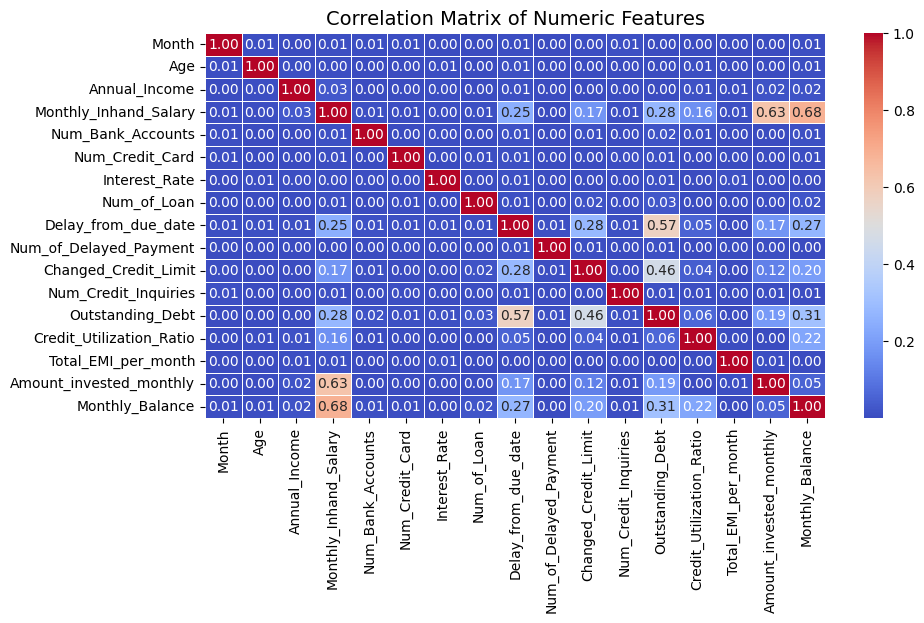

In [1005]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.show()

In [1006]:
# there is no obvious multicoliniarity but i still wrote the code incase if i want to change the threshold
threshold = 0.6
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [1007]:
df_reduced = data_new_corr.drop(to_drop, axis=1)
print("Dropped columns due to high correlation:", to_drop)

Dropped columns due to high correlation: ['Amount_invested_monthly', 'Monthly_Balance']


In [1008]:
data_new.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1608,CUS_0xd40,7,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
2,0x160e,CUS_0x21b1,1,28.0,004-07-5839,_______,34847.84,3037.986667,2,4,...,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
3,0x160f,CUS_0x21b1,2,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,4,...,2.0,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
4,0x1610,CUS_0x21b1,3,28.0,004-07-5839,Teacher,NaN,3037.986667,2,1385,...,2.0,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard


In [1009]:
#data_new_corr = data_new.select_dtypes(include=['int64', 'float64'])


In [1010]:
#corr_matrix = data_new_corr.select_dtypes(include=[np.number]).corr().abs()


In [1011]:
print(data_new['Age'].max())
print(data_new['Age'].min())
print(data_new['Age'].mean())
print(data_new['Age'].nunique())


8697.0
-500.0
111.86038500905441
958


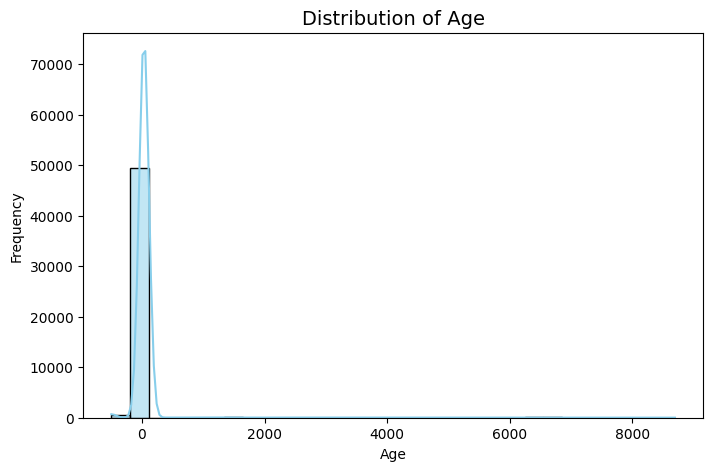

In [1012]:
plt.figure(figsize=(8,5))
sns.histplot(data_new['Age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

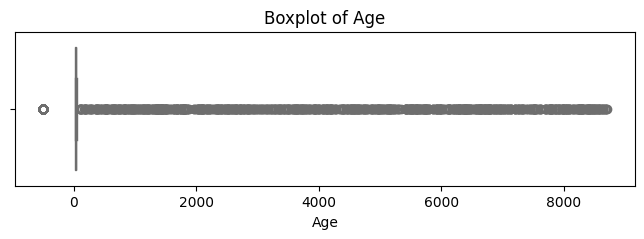

In [1013]:
plt.figure(figsize=(8,2))
sns.boxplot(x=data_new['Age'], color='lightcoral')
plt.title("Boxplot of Age")
plt.show()

In [1014]:
data_new = data_new[(data_new['Age'] > 0) & (data_new['Age'] <= 100)]


In [1015]:
print(data_new['Age'].max())
print(data_new['Age'].min())
print(data_new['Age'].mean())
print(data_new['Age'].nunique())

100.0
14.0
32.94479322775325
45


## Exploratory Data Analysis (EDA)
### Analysis
__Answer objectives using visual and statistical insights__
- Trends, relationships, anomalies
- Outlier and missing values treatment
- Univariate, bivariate, or multivariate analysis
    - Histograms, box plots, bar charts
    - Correlation matrix for continuous columns (required if applicable)


In [1016]:
numeric_cols = data_new.select_dtypes(include=['int64', 'float64']).columns


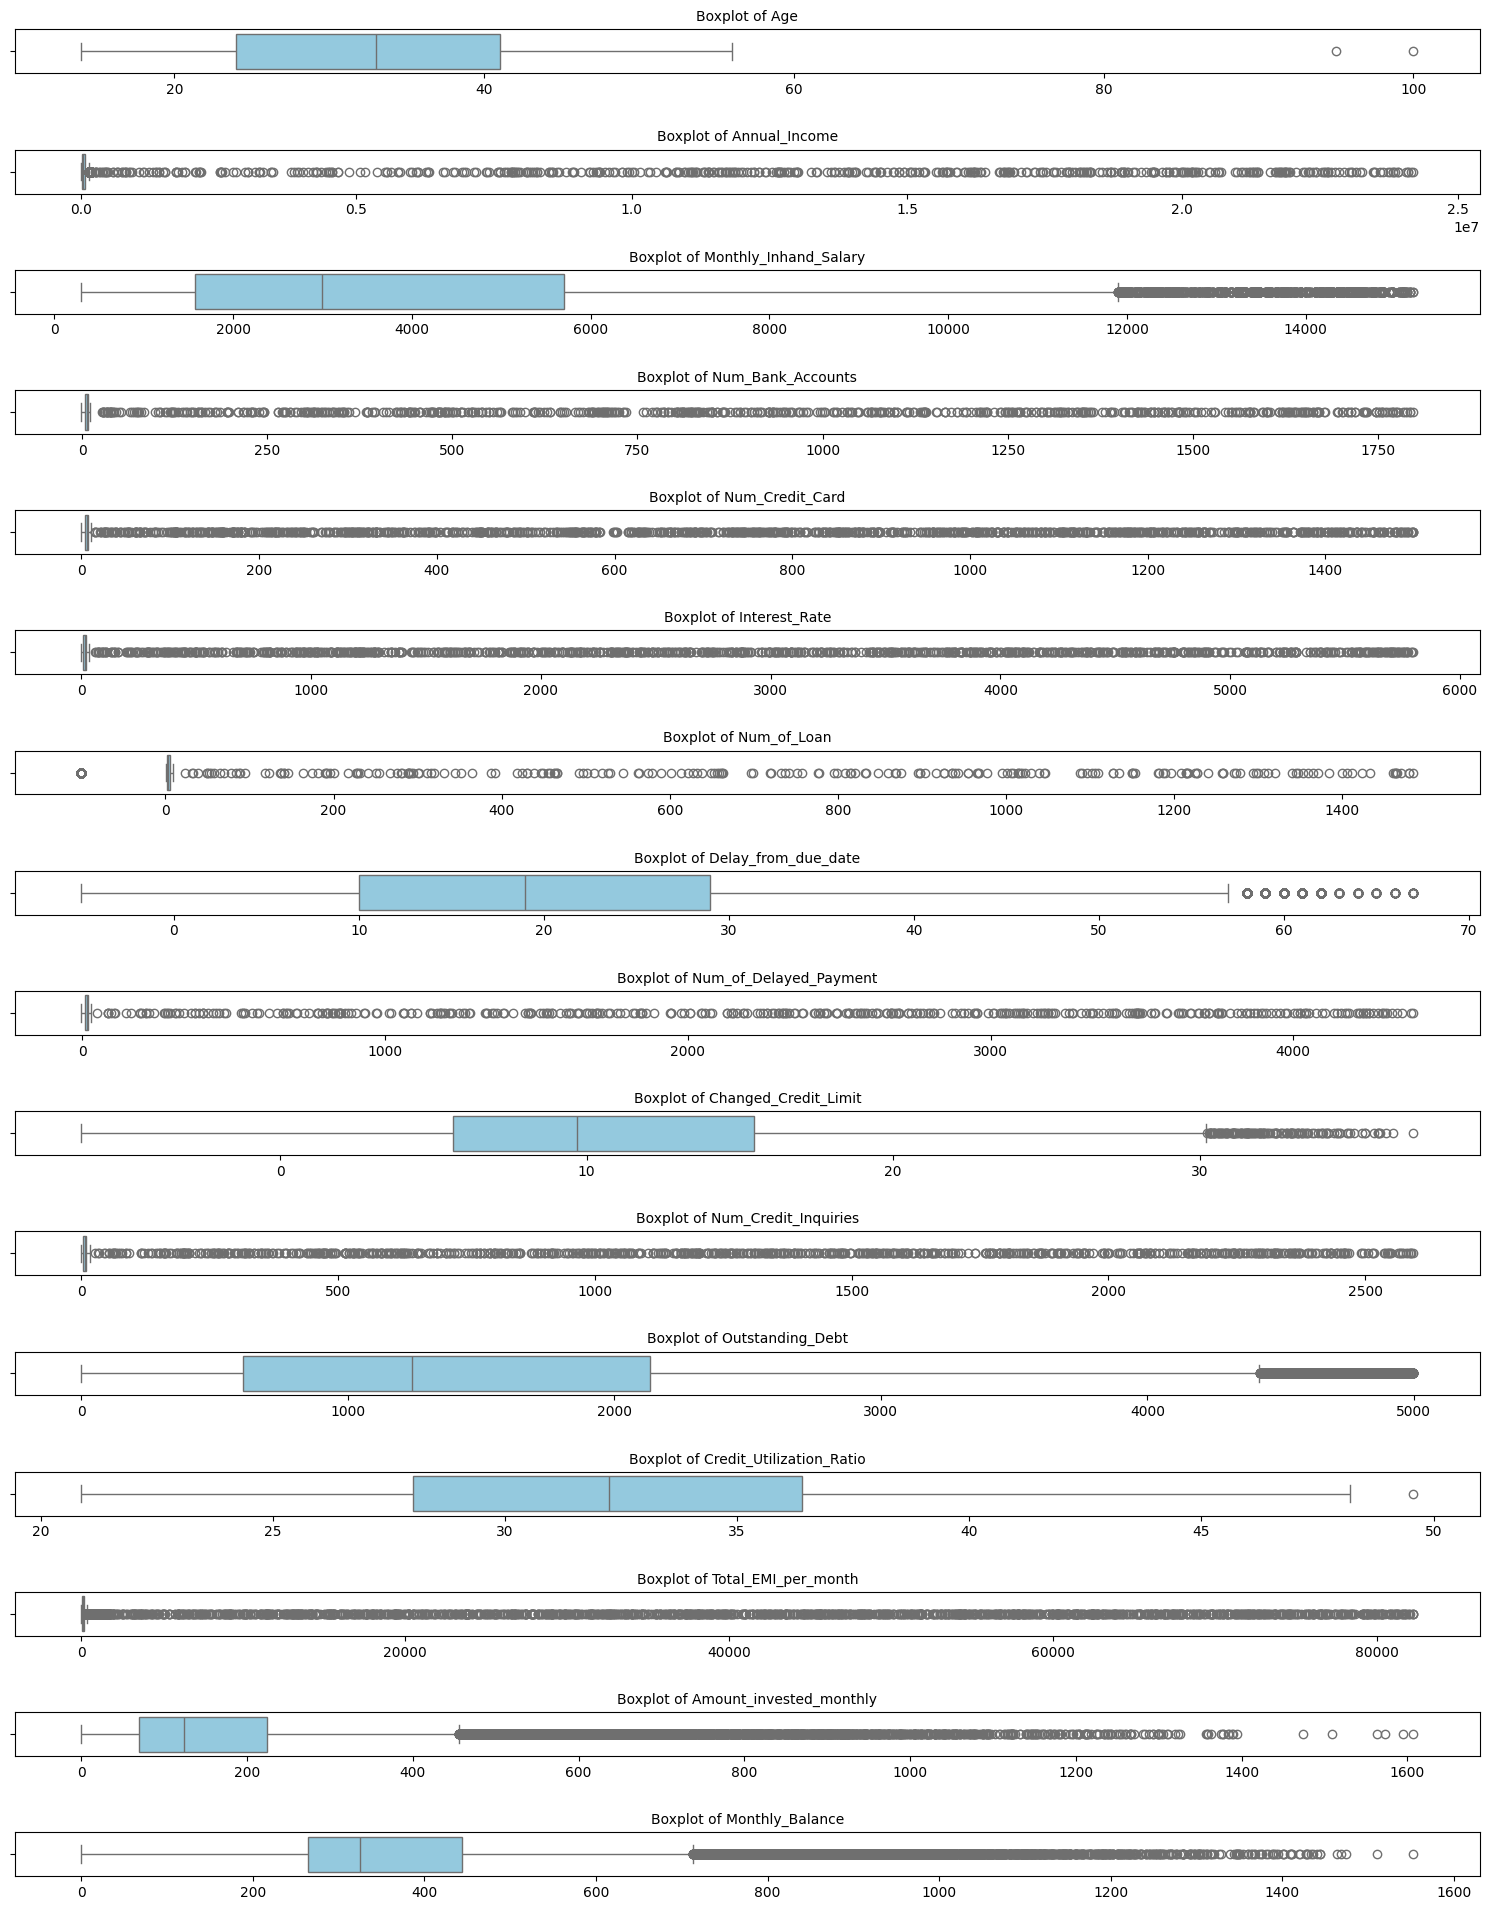

In [1017]:
num_cols = len(numeric_cols)
plt.figure(figsize=(15, num_cols * 1.2))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_cols, 1, i)
    sns.boxplot(x=data_new[col], color='skyblue')
    plt.title(f"Boxplot of {col}", fontsize=10)
    plt.xlabel("")
    plt.tight_layout()

plt.show()

In [1018]:
data_new = data_new[(data_new['Age'] > 0) & (data_new['Age'] <= 60)]

data_new = data_new[(data_new['Num_of_Loan'] > 0) ]


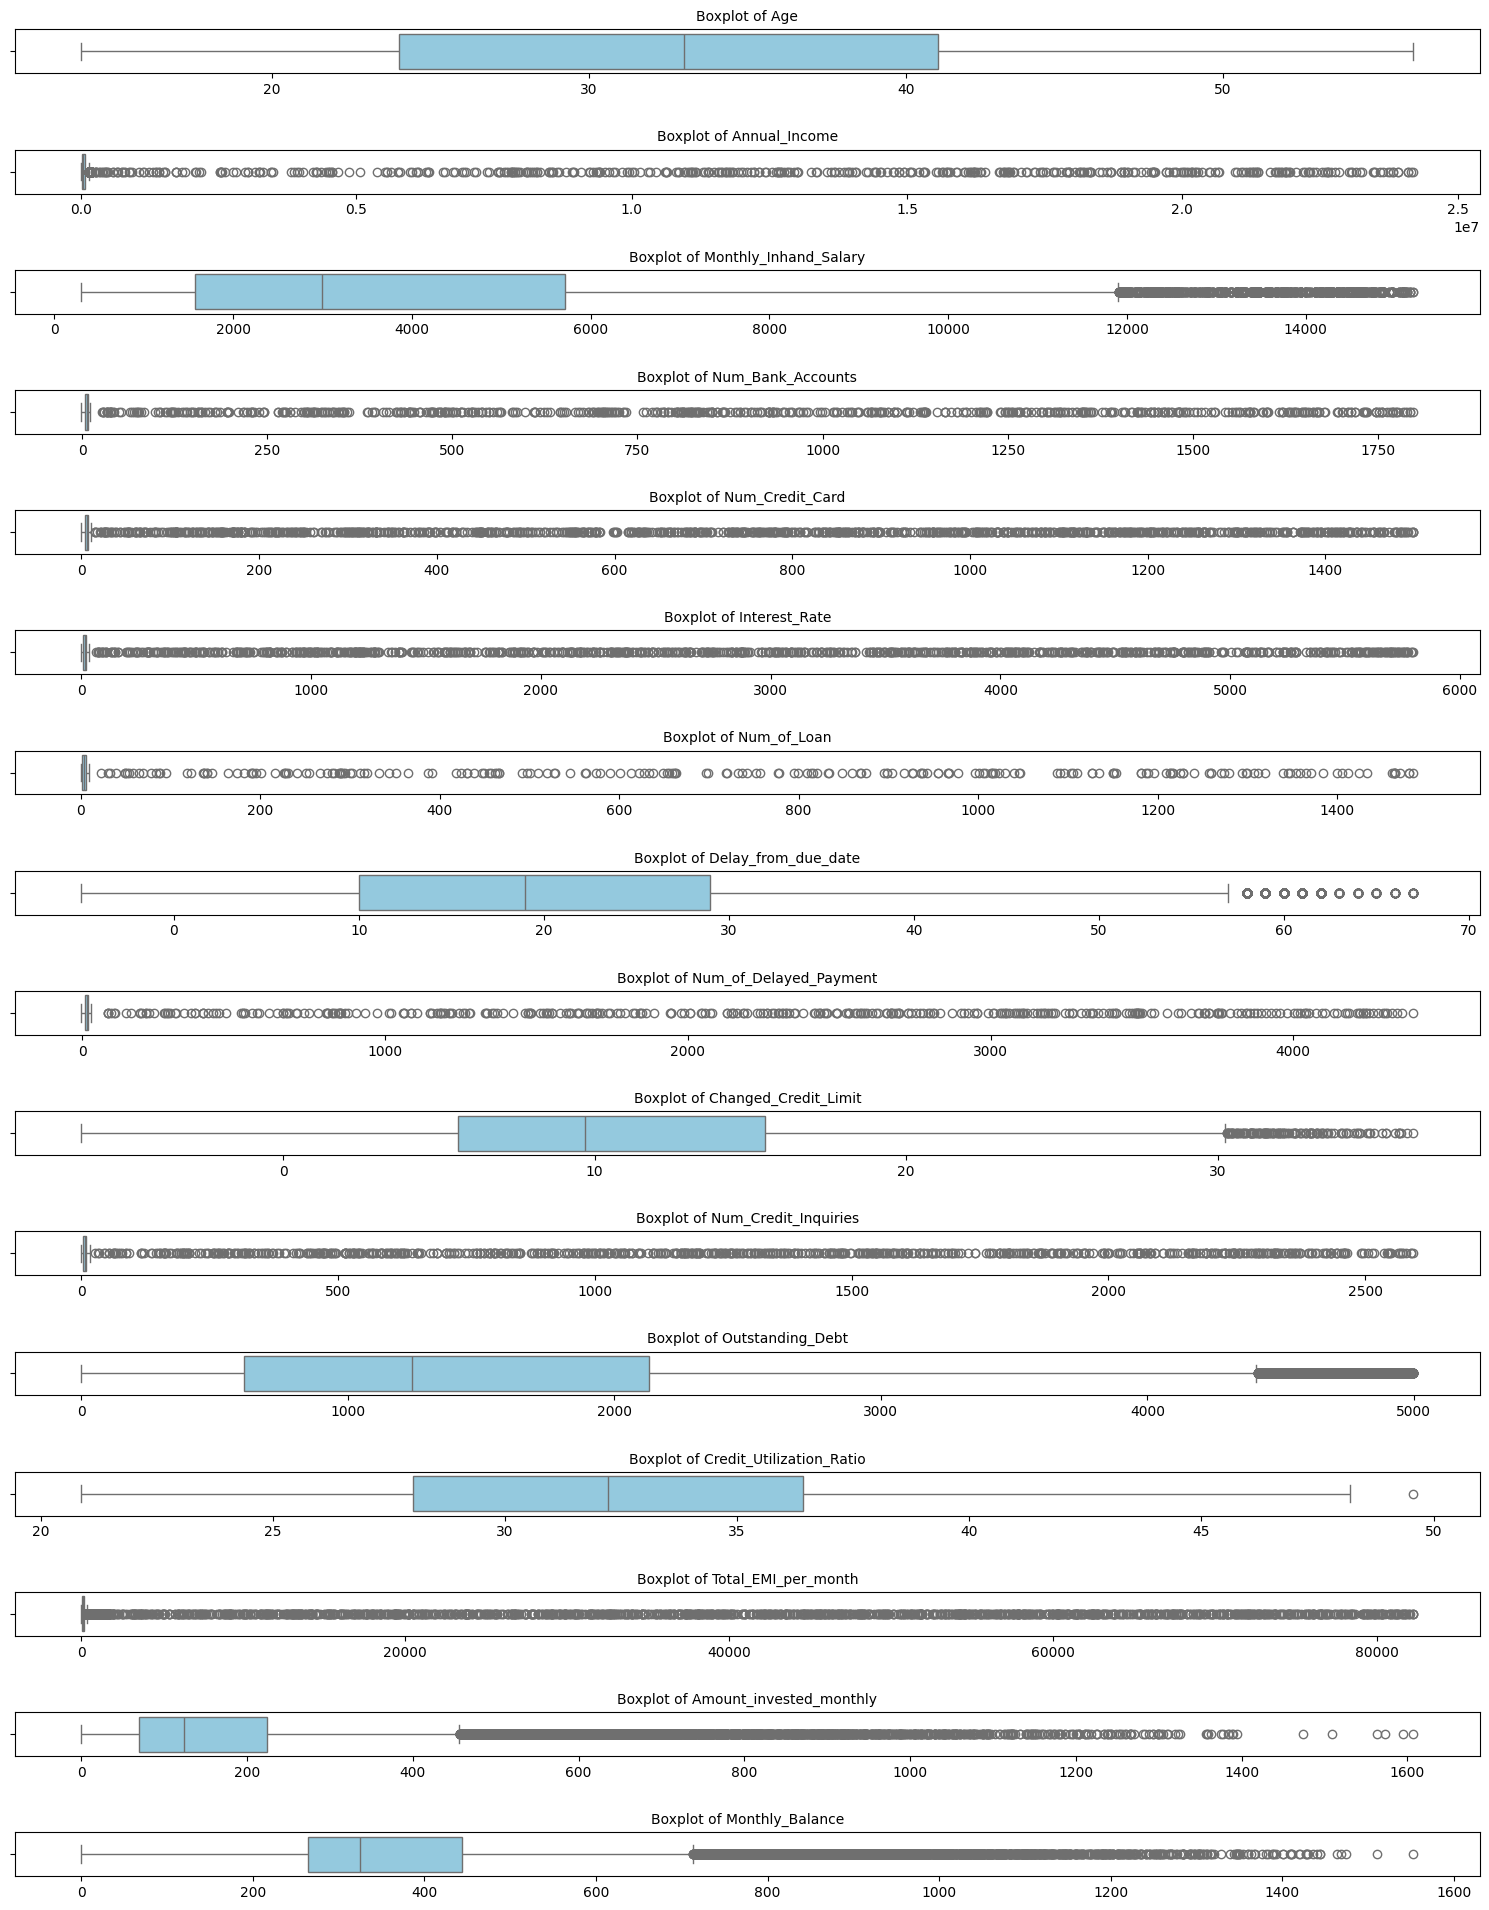

In [1019]:
num_cols = len(numeric_cols)
plt.figure(figsize=(15, num_cols * 1.2))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_cols, 1, i)
    sns.boxplot(x=data_new[col], color='skyblue')
    plt.title(f"Boxplot of {col}", fontsize=10)
    plt.xlabel("")
    plt.tight_layout()

plt.show()

### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)


In [1020]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# will use it then when knn

In [1021]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    26844
Poor        15837
Good         8123
Name: count, dtype: int64

## Model Building
__Build and compare two models for your topic__
### Model 1: Linear / Logistic Regression
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met
 ...


In [1022]:
data.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1608,CUS_0xd40,July,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,4.0,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
2,0x160e,CUS_0x21b1,January,28_,004-07-5839,_______,34847.84,3037.986667,2,4,...,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
3,0x160f,CUS_0x21b1,February,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,...,2.0,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
4,0x1610,CUS_0x21b1,March,28,004-07-5839,Teacher,34847.84_,3037.986667,2,1385,...,2.0,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard


In [1023]:
#only the data to be incloudedin the model: 
df = data[['Age','Num_Bank_Accounts','Outstanding_Debt','Num_of_Delayed_Payment']].copy()
X = pd.get_dummies(df, drop_first=True)
y=data['Credit_Score']

In [1024]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1025]:
model1 = LogisticRegression()


In [1026]:
#model1.fit(X_train, y_train)


In [1027]:
"""y_preds1 = model1.predict(X_test)
y_preds1"""

'y_preds1 = model1.predict(X_test)\ny_preds1'

In [1028]:
"""from sklearn.metrics import ConfusionMatrixDisplay

class_names = ['Standard','Poor','Good']
ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues);"""

"from sklearn.metrics import ConfusionMatrixDisplay\n\nclass_names = ['Standard','Poor','Good']\nConfusionMatrixDisplay.from_estimator(model1, X_test, y_test,\n                                 display_labels=class_names,\n                                 cmap=plt.cm.Blues);"

In [1029]:
"""# Accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test, y_preds1)}')

# Recall / Sensitivity / True Positive Rate (TPR)
print(f'Recall / Sensitivity / True Positive Rate (TPR): {metrics.recall_score(y_test, y_preds1, average="macro"):.4f}')

# Precision
print(f'Precision: {metrics.precision_score(y_test, y_preds1, average="macro"):.4f}')

# F1 Score
print(f'F1 Score: {metrics.f1_score(y_test, y_preds1, average="macro"):.4f}')

# Specificity / True Negative Rate (TNR) is not defined in scikit-learn
# Specificity / True Negative Rate (TNR) can be calculated from recall_score by inverting the labels
specificity = metrics.recall_score(y_test, y_preds1, pos_label=0 , average="macro")
print(f'Specificity / True Negative Rate (TNR): {specificity}')
"""



'# Accuracy\nprint(f\'Accuracy: {metrics.accuracy_score(y_test, y_preds1)}\')\n\n# Recall / Sensitivity / True Positive Rate (TPR)\nprint(f\'Recall / Sensitivity / True Positive Rate (TPR): {metrics.recall_score(y_test, y_preds1, average="macro"):.4f}\')\n\n# Precision\nprint(f\'Precision: {metrics.precision_score(y_test, y_preds1, average="macro"):.4f}\')\n\n# F1 Score\nprint(f\'F1 Score: {metrics.f1_score(y_test, y_preds1, average="macro"):.4f}\')\n\n# Specificity / True Negative Rate (TNR) is not defined in scikit-learn\n# Specificity / True Negative Rate (TNR) can be calculated from recall_score by inverting the labels\nspecificity = metrics.recall_score(y_test, y_preds1, pos_label=0 , average="macro")\nprint(f\'Specificity / True Negative Rate (TNR): {specificity}\')\n'

In [1030]:
#now for the cleaned dataset:
#only the data to be incloudedin the model: 
df2 = data_new.drop('Credit_Score', axis=1).copy()
X2 = pd.get_dummies(df2, drop_first=True)
y2=data_new['Credit_Score']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [1031]:
model2 = LogisticRegression()


In [1037]:
high_card_cols = [c for c in df2.columns if df2[c].nunique() > 300]  
df2 = df2.drop(columns=high_card_cols)

In [ ]:
'''X2 = pd.get_dummies(df2, drop_first=True)
X2 = X2.astype(pd.SparseDtype("float32", 0))
X2_csr = X2.sparse.to_coo().tocsr() '''

In [ ]:
# i had a problem with running the next cell. its not running due to lack of storage. so im just gonna put the model codes and evaluation codes
# but i cant really see the results as i cant run

In [1040]:
model2.fit(X_train2, y_train2)


MemoryError: Unable to allocate 12.1 GiB for an array with shape (45145, 36116) and data type float64

In [ ]:
y_preds2 = model2.predict(X_test)
y_preds2

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ['Standard','Poor','Good']
ConfusionMatrixDisplay.from_estimator(model2, X_test2, y_test2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues);

In [ ]:
# Accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test2, y_preds2)}')

# Recall / Sensitivity / True Positive Rate (TPR)
print(f'Recall / Sensitivity / True Positive Rate (TPR): {metrics.recall_score(y_test2, y_preds2, average="macro"):.4f}')

# Precision
print(f'Precision: {metrics.precision_score(y_test2, y_preds2, average="macro"):.4f}')

# F1 Score
print(f'F1 Score: {metrics.f1_score(y_test2, y_preds2,average="macro"):.4f}')

# Specificity / True Negative Rate (TNR) is not defined in scikit-learn
# Specificity / True Negative Rate (TNR) can be calculated from recall_score by inverting the labels
specificity = metrics.recall_score(y_test2, y_preds2, pos_label=0 , average="macro")
print(f'Specificity / True Negative Rate (TNR): {specificity}')

NameError: name 'y_test2' is not defined

### Model 2: KNN Regressor / KNN Classifier
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met 
 ...


In [1042]:
#starting with the raw data for the knn model : 
df3 = data[['Age','Num_Bank_Accounts','Outstanding_Debt','Num_of_Delayed_Payment']].copy()
X3 = pd.get_dummies(df3, drop_first=True)
y3=data['Credit_Score']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
#im unable to run the next slides too due to the same error, so im just leaving them here without seeing the results

In [1043]:
#scaling the data for a better knn model:
X_train_scaled = sc.fit_transform(X_train3)
X_test_scaled = sc.transform(X_test3)

MemoryError: Unable to allocate 3.44 GiB for an array with shape (11363, 40643) and data type float64

In [ ]:
#fitting the model:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train3)


In [ ]:
y_pred_knn = knn.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

class_names = ['Standard','Poor','Good']
ConfusionMatrixDisplay.from_estimator(knn, X_test3, y_test3,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues);

In [ ]:
# Accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test3, y_pred_knn)}')

# Recall / Sensitivity / True Positive Rate (TPR)
print(f'Recall / Sensitivity / True Positive Rate (TPR): {metrics.recall_score(y_test3, y_pred_knn, average="macro"):.4f}')

# Precision
print(f'Precision: {metrics.precision_score(y_test3, y_pred_knn, average="macro"):.4f}')

# F1 Score
print(f'F1 Score: {metrics.f1_score(y_test3, y_pred_knn, average="macro"):.4f}')

# Specificity / True Negative Rate (TNR) is not defined in scikit-learn
# Specificity / True Negative Rate (TNR) can be calculated from recall_score by inverting the labels
specificity = metrics.recall_score(y_test3, y_pred_knn, pos_label=0 , average="macro")
print(f'Specificity / True Negative Rate (TNR): {specificity}')

In [ ]:
#for the cleaned data
df4 = data_new.drop('Credit_Score', axis=1).copy()
X4= pd.get_dummies(df4, drop_first=True)
y4=data_new['Credit_Score']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)


In [ ]:
X_train_scaled2 = sc.fit_transform(X_train4)
X_test_scaled2 = sc.transform(X_test4)

In [ ]:
#fitting the model:

knn2= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled2, y_train4)

In [ ]:
y_pred_knn2 = knn2.predict(X_test_scaled2)

In [ ]:
class_names = ['Standard','Poor','Good']
ConfusionMatrixDisplay.from_estimator(knn2, X_test4, y_test4,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues);

In [ ]:
# Accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_knn2)}')

# Recall / Sensitivity / True Positive Rate (TPR)
print(f'Recall / Sensitivity / True Positive Rate (TPR): {metrics.recall_score(y_test4, y_pred_knn2, average="macro"):.4f}')

# Precision
print(f'Precision: {metrics.precision_score(y_test4, y_pred_knn2, average="macro"):.4f}')

# F1 Score
print(f'F1 Score: {metrics.f1_score(y_test4, y_pred_knn2, average="macro"):.4f}')

# Specificity / True Negative Rate (TNR) is not defined in scikit-learn
# Specificity / True Negative Rate (TNR) can be calculated from recall_score by inverting the labels
specificity = metrics.recall_score(y_test4, y_pred_knn2, pos_label=0 , average="macro")
print(f'Specificity / True Negative Rate (TNR): {specificity}')

### Model Evaluation
__Use appropriate metrics based on task type and compare between the Models and their versions__

__For Regression:__
- R² Score
- Root Mean Squared Error (RMSE)
- Residual plots


__For Classification:__
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC _**(Optional)**_
- Confusion Matrix

_Include visualizations and interpretation for each metric._


In [ ]:
#evaluation code is in the upper cells

### Model Comparison
__Compare performance across models and versions__

__Note:__ _Use Bullet Points or table_
- Which model performed best and why
- Impact of feature changes or tuning
- Generalization and overfitting observations


In [ ]:
# i cant compare since i cant see the results

## Final Model & Insights
__Summarize your final model and key takeaways__

__Note__: _Use Bullet Points_
- Final model choice
- Business implications
- Limitations and future improvements


## References & Appendix
__Cite tools, libraries, and sources used__